In [1]:
import matplotlib.pyplot as plt  # pip install matplotlib
import seaborn as sns # pip install seaborn
import plotly.graph_objects as go  # pip install plotly
import imageio  # pip install imageio

In [2]:
import grid2op
env = grid2op.make(test=True)

C:\Users\LXM\AppData\Roaming\Python\Python37\site-packages\grid2op\MakeEnv\Make.py:265: UserWarning: You are using a development environment. This environment is not intended for training agents. It might not be up to date and its primary use if for tests (hence the "test=True" you passed as argument). Use at your own risk.
  warnings.warn(_MAKE_DEV_ENV_WARN)


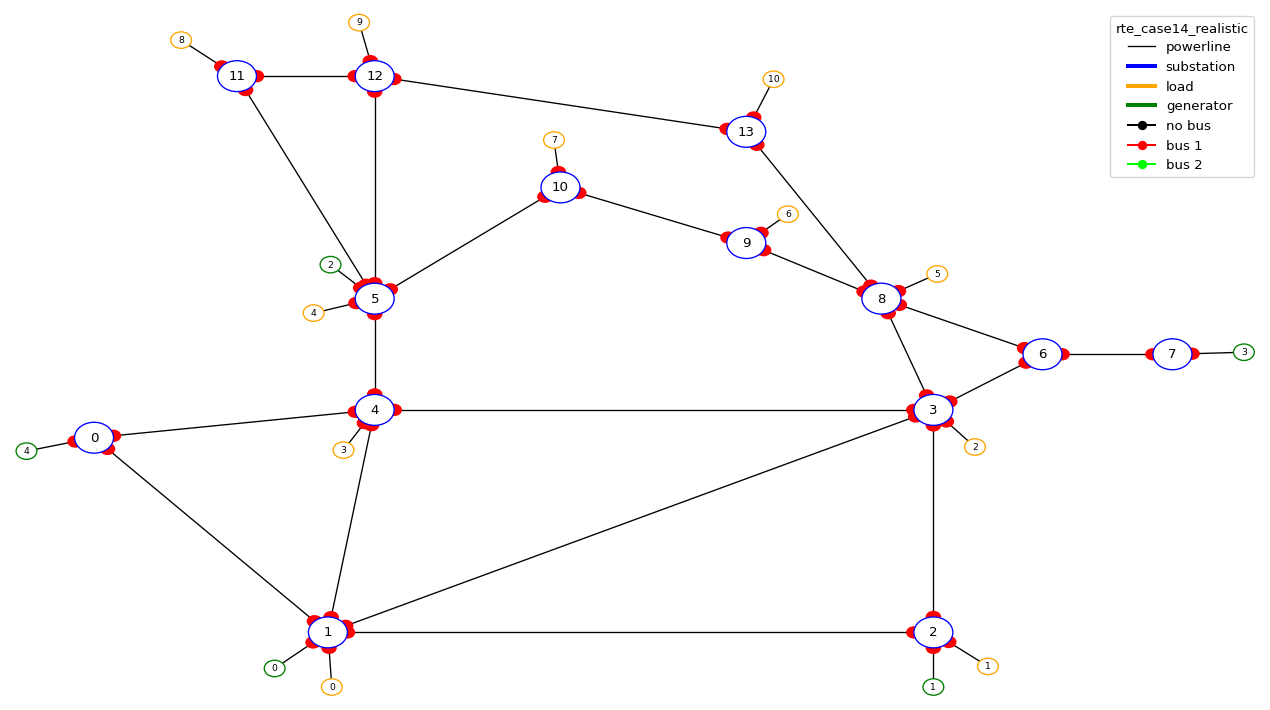

In [3]:
from grid2op.PlotGrid import PlotMatplot
plot_helper = PlotMatplot(env.observation_space)
line_ids = [int(i) for i in range(env.n_line)]
fig_layout = plot_helper.plot_layout()



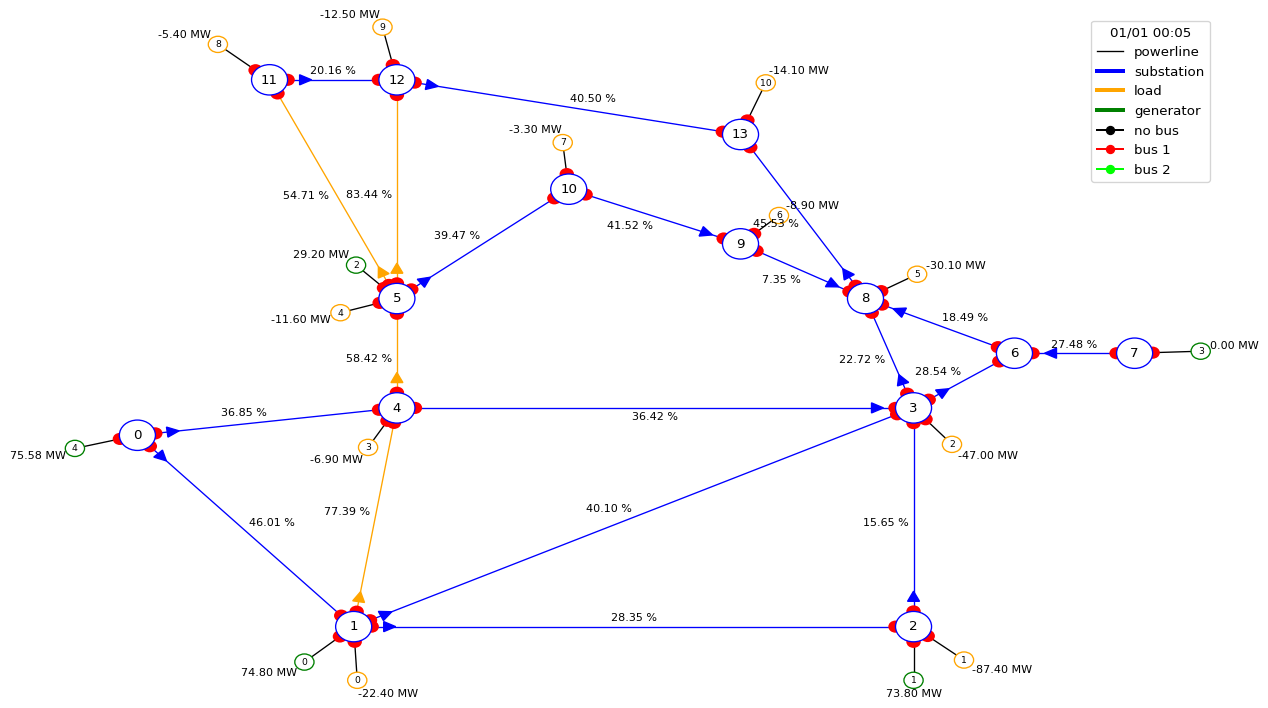

In [4]:
obs = env.reset()
fig_obs = plot_helper.plot_obs(obs)


In [5]:
action = env.action_space({"set_bus": {"loads_id": [(0,2)], "lines_or_id": [(3,2)], "lines_ex_id": [(0,2)]}})
print(action)


This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - NOT force any line status
	 - NOT switch any line status
	 - NOT switch anything in the topology
	 - Set the bus of the following element:
	 	 - assign bus 2 to line (extremity) 0 [on substation 1]
	 	 - assign bus 2 to line (origin) 3 [on substation 1]
	 	 - assign bus 2 to load 0 [on substation 1]


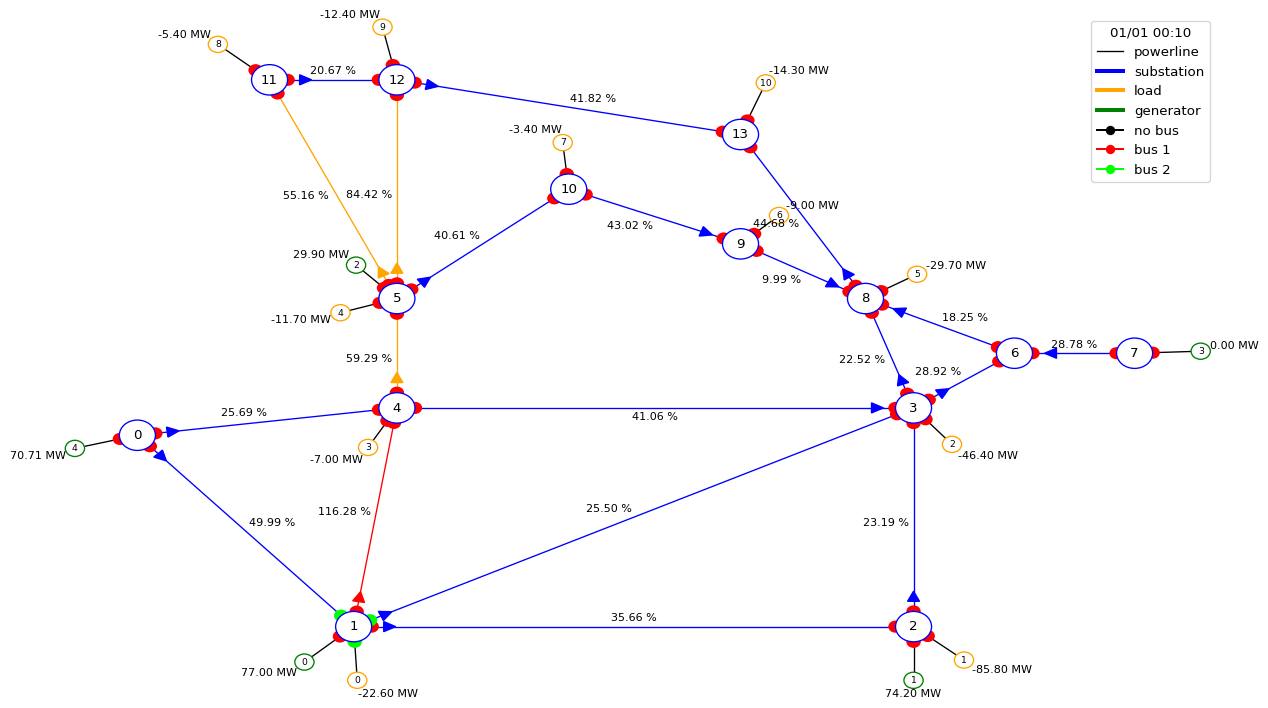

In [6]:
new_obs, reward, done, info = env.step(action)
fig_obs3 = plot_helper.plot_obs(new_obs)



C:\Users\LXM\AppData\Roaming\Python\Python37\site-packages\grid2op\Environment\Environment.py:618: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


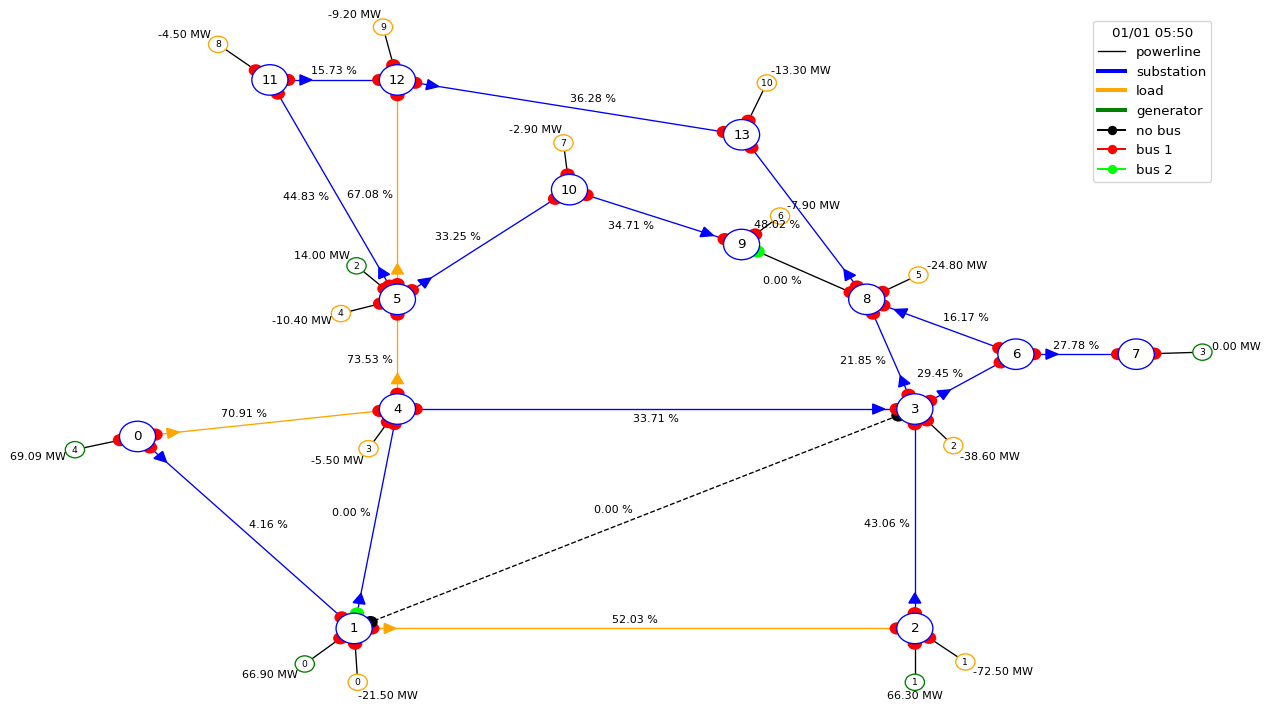

In [7]:
from grid2op.Agent import RandomAgent

class CustomRandom(RandomAgent):
    def __init__(self, action_space):
        RandomAgent.__init__(self, action_space)
        self.i = 1

    def my_act(self, transformed_observation, reward, done=False):
        if (self.i % 10) != 0:
            res = 0
        else:
            res = self.action_space.sample()
        self.i += 1
        return res
    
myagent = CustomRandom(env.action_space)
obs = env.reset()
reward = env.reward_range[0]
done = False
while not done:
    env.render()
    act = myagent.act(obs, reward, done)
    obs, reward, done, info = env.step(act)
env.close()

In [8]:
from grid2op.Runner import Runner
env = grid2op.make(test=True)
my_awesome_agent = CustomRandom(env.action_space)
runner = Runner(**env.get_params_for_runner(), agentClass=None, agentInstance=my_awesome_agent)

C:\Users\LXM\AppData\Roaming\Python\Python37\site-packages\grid2op\MakeEnv\Make.py:265: UserWarning: You are using a development environment. This environment is not intended for training agents. It might not be up to date and its primary use if for tests (hence the "test=True" you passed as argument). Use at your own risk.
  warnings.warn(_MAKE_DEV_ENV_WARN)


In [9]:
import os
path_agents = "path_agents"  # this is mandatory for grid2viz to have a directory with only agents
# that is why we have it here. It is aboslutely not mandatory for this more simple class.
max_iter = 10  # to save time we only assess performance on 30 iterations
if not os.path.exists(path_agents):
    os.mkdir(path_agents)
path_awesome_agent_log = os.path.join(path_agents, "awesome_agent_logs")
res = runner.run(nb_episode=2, path_save=path_awesome_agent_log, max_iter=max_iter)


C:\Users\LXM\AppData\Roaming\Python\Python37\site-packages\grid2op\Episode\EpisodeReplay.py:177: UserWarning: Failed to optimize .GIF size, but gif is still saved:
Install dependencies to reduce size by ~3 folds
apt-get install gifsicle && pip3 install pygifsicle
  warnings.warn(warn_msg)


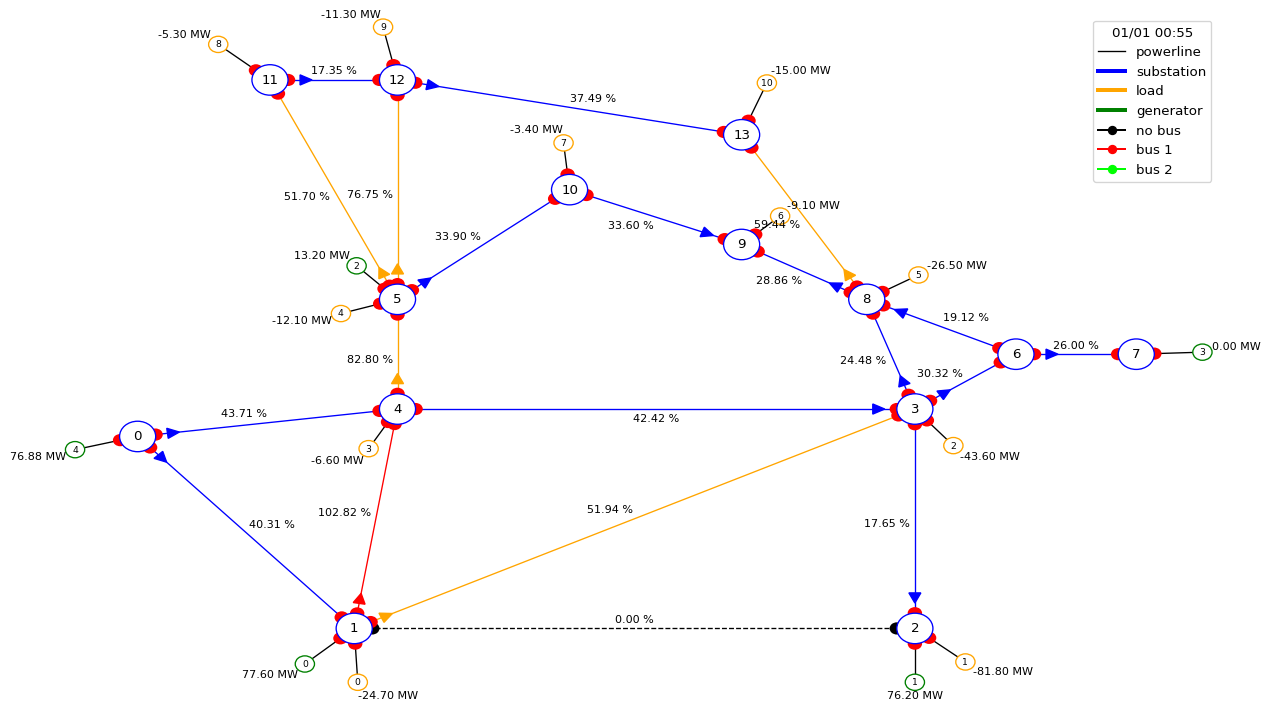

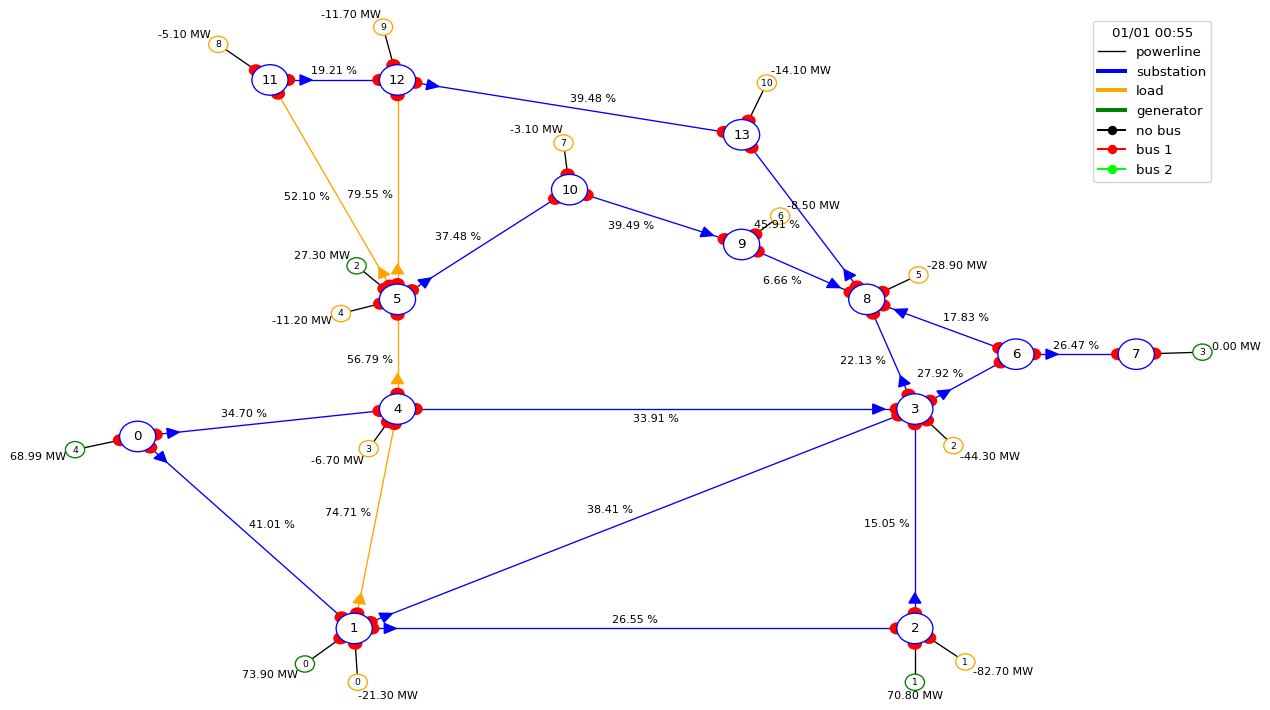

In [10]:
from grid2op.Episode import EpisodeReplay
gif_name = "episode"
ep_replay = EpisodeReplay(agent_path=path_awesome_agent_log)
for _, chron_name, cum_reward, nb_time_step, max_ts in res:
    ep_replay.replay_episode(chron_name,  # which chronic was started
                             gif_name=gif_name, # Name of the gif file
                             display=False,  # dont wait before rendering each frames
                             fps=3.0)  # limit to 3 frames per second


In [19]:
# make a runner for this agent
from grid2op.Agent import DoNothingAgent, TopologyGreedy
import shutil

for agentClass, agentName in zip([DoNothingAgent],  # , TopologyGreedy
                                 ["DoNothingAgent"]):  # , "TopologyGreedy"
    path_this_agent = os.path.join(path_agents, agentName)
    shutil.rmtree(os.path.abspath(path_this_agent), ignore_errors=True)
    runner = Runner(**env.get_params_for_runner(),
                    agentClass=agentClass
                    )
    res = runner.run(path_save=path_this_agent, nb_episode=10, 
                    max_iter=800)
    print("The results for the {} agent are:".format(agentName))
    for _, chron_id, cum_reward, nb_time_step, max_ts in res:
        msg_tmp = "\tFor chronics with id {}\n".format(chron_id)
        msg_tmp += "\t\t - cumulative reward: {:.6f}\n".format(cum_reward)
        msg_tmp += "\t\t - number of time steps completed: {:.0f} / {:.0f}".format(nb_time_step, max_ts)
        print(msg_tmp)


The results for the DoNothingAgent agent are:
	For chronics with id 000
		 - cumulative reward: 888427.500000
		 - number of time steps completed: 799 / 800
	For chronics with id 001
		 - cumulative reward: 887177.687500
		 - number of time steps completed: 800 / 800
	For chronics with id 000
		 - cumulative reward: 888427.500000
		 - number of time steps completed: 799 / 800
	For chronics with id 001
		 - cumulative reward: 887177.687500
		 - number of time steps completed: 800 / 800
	For chronics with id 000
		 - cumulative reward: 888427.500000
		 - number of time steps completed: 799 / 800
	For chronics with id 001
		 - cumulative reward: 887177.687500
		 - number of time steps completed: 800 / 800
	For chronics with id 000
		 - cumulative reward: 888427.500000
		 - number of time steps completed: 799 / 800
	For chronics with id 001
		 - cumulative reward: 887177.687500
		 - number of time steps completed: 800 / 800
	For chronics with id 000
		 - cumulative reward: 888427.500000
		

In [12]:
import sys
shutil.rmtree(os.path.join(os.path.abspath(path_agents), "_cache"), ignore_errors=True)
!$sys.executable -m grid2viz.main --path=$path_agents


usage: main.py [-h] [--agents_path AGENTS_PATH] [--env_path ENV_PATH]
               [--port PORT] [--debug] [--n_cores N_CORES] [--cache CACHE]
main.py: error: unrecognized arguments: --path=path_agents
